# Barclays Problem Statement (Beatrice Goh)


## Airfoil Noise dataset from UCI Machine Learning Repository
- https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise

Airfoils produce a tonal noise when operating at low to moderate Reynolds number. This tonal noise can be annoying to the human ear and is problematic for the design of fans, compressors, helicopter rotors and unmanned air vehicles.

https://www.researchgate.net/publication/237077896_Airfoil_noise_measurements_at_various_angles_of_attack_and_low_Reynolds_number#:~:text=Airfoils%20produce%20tonal%20noise%20when%20operated%20at%20low-to-moderate,fans%2C%20compressors%2C%20helicopter%20rotors%20and%20unmanned%20air%20vehicles.

The goal of this project is to estimate the noise level of an airfoil based on the characteristics of 
- Frequency, in Hertzs.
- Angle of attack, in degrees.
- Chord length, in meters.
- Free-stream velocity, in meters per second.
- Suction side displacement thickness, in meters.

The output is scaled sound pressure level, in decibels. 

This is a regression problem and we will explore several machine learning models and compare which model provides the best predictive power. 

## Import libraries and access dataset

In [29]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

In [2]:
# Open file and write data to numpy array 

data_list = []
with open('airfoil_self_noise.dat') as f:
    for line in f:
        
        # remove \n from end of string
        line1 = line.replace('\n','')
        
        # split string by delimiter
        rline = line1.split('\t')
        
        # combine data into one big list
        data_list.append(rline)
       
    # Convert to pandas dataframe, column names as per meta data
    df = pd.DataFrame(data_list, columns=['frequency','angle_of_attack','chord_length','velocity','thickness','sound_level'])

In [3]:
# Check data types and any missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   frequency        1503 non-null   object
 1   angle_of_attack  1503 non-null   object
 2   chord_length     1503 non-null   object
 3   velocity         1503 non-null   object
 4   thickness        1503 non-null   object
 5   sound_level      1503 non-null   object
dtypes: object(6)
memory usage: 70.6+ KB


In [4]:
# Convert data type from string to float

for n in df.columns: 
    df[n] = df[n].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   frequency        1503 non-null   float64
 1   angle_of_attack  1503 non-null   float64
 2   chord_length     1503 non-null   float64
 3   velocity         1503 non-null   float64
 4   thickness        1503 non-null   float64
 5   sound_level      1503 non-null   float64
dtypes: float64(6)
memory usage: 70.6 KB


## 1) Data Exploration & Visualisation

### Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [5]:
df.head(2)

,frequency,angle_of_attack,chord_length,velocity,thickness,sound_level
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201


### Comment on class imbalance with appropriate visualization method.

Visualisation of target value

Observation: As the target values are continuous in nature, the best way to represent the distribution is through a histogram.The graph is left skewed, with average sound level at 124.84 decibels and peak distribution between 125-130 decibels.


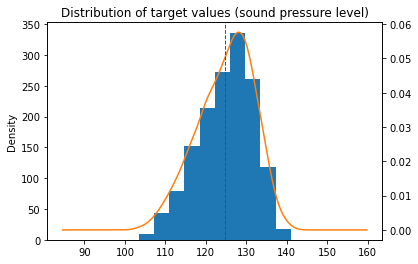

In [6]:
avg_value = round(df['sound_level'].mean(),2)

ax = df.sound_level.plot(kind='hist')
df.sound_level.plot(kind='kde', ax=ax, secondary_y=True)

plt.title('Distribution of target values (sound pressure level)')
plt.axvline(df['sound_level'].mean(), color='red', linestyle='dashed', linewidth=1)
# plt.annotate(f'Average sound level = {avg_value} decibels', xy=(0, 0), xytext=(2, 1.5),
#              arrowprops=dict(facecolor='black', shrink=0.05))
#plt.show()


print(f'Observation: As the target values are continuous in nature, the best way to represent the distribution is through a histogram.The graph is left skewed, with average sound level at {avg_value} decibels and peak distribution between 125-130 decibels.')


### Provide appropriate visualizations to get an insight about the dataset.

Visualisation of input features

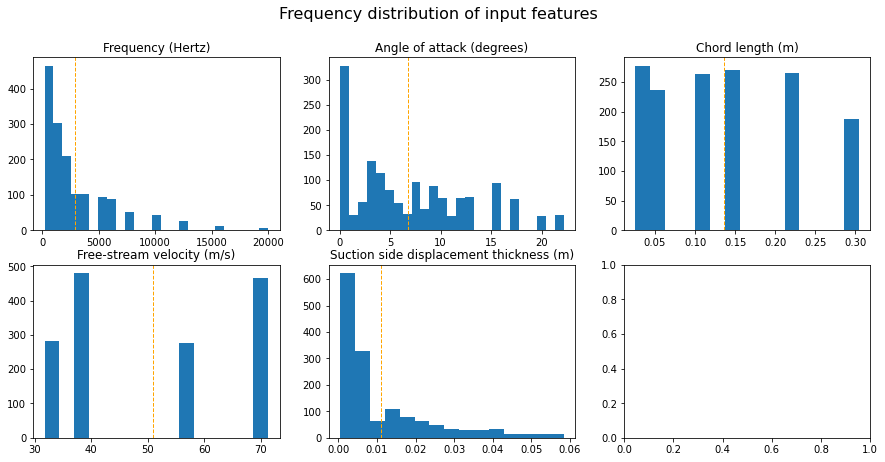

In [36]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))

fig.suptitle('Frequency distribution of input features',fontsize=16)

# Frequency distribution of frequency

ax[0,0].hist(df['frequency'], bins = 25)
ax[0,0].set_title('Frequency (Hertz)')
ax[0,0].axvline(df['frequency'].mean(), color='orange', linestyle='dashed', linewidth=1)


# Frequency distribution of angle of attack

ax[0,1].hist(df['angle_of_attack'], bins=25)
ax[0,1].set_title('Angle of attack (degrees)')
ax[0,1].axvline(df['angle_of_attack'].mean(), color='orange', linestyle='dashed', linewidth=1)
# plt.annotate(f'Average sound level = {avg_value} decibels', xy=(0, 0), xytext=(2, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05))


# Frequency distribution of chord length

ax[0,2].hist(df['chord_length'], bins=15)
ax[0,2].set_title('Chord length (m)')
ax[0,2].axvline(df['chord_length'].mean(), color='orange', linestyle='dashed', linewidth=1)

# Frequency distribution of velocity

ax[1,0].hist(df['velocity'],bins=15)
ax[1,0].set_title('Free-stream velocity (m/s)')
ax[1,0].axvline(df['velocity'].mean(), color='orange', linestyle='dashed', linewidth=1)

# Frequency distribution of thickness

ax[1,1].hist(df['thickness'], bins=15)
ax[1,1].set_title('Suction side displacement thickness (m)')
ax[1,1].axvline(df['thickness'].mean(), color='orange', linestyle='dashed', linewidth=1)

plt.show()

#### Commentary on input features 

1. Frequency - Distribution is highly skewed to the right, with majority of the occurrences with frequencies below 2500Hz.
2. Angle of attack - Distribution is downward sloping, with majority of the occurrences with an angle of attack below 5 degrees.
3. Chord length - About one-third of the instances have chord length 0.05m or less. The remainder of the instances are fairly evenly distributed across chord length ranging from 0.1m to 0.3m. 
4. Free-stream velocity - does not appear to have a shape of a normal continuous distribution but tends towards 4 groups of values, as seen by the 4 bars in the histogram. 
5. Suction side displacement thickness - More than 60% of the instances had thickness of 0.005m or less. The remaining instances were distributed in a right skewed distribution, with outlier values going up to 0.06m. 


### Do the correlational analysis on the dataset.

Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be awarded marks.

The input features do not appear to be correlated to the target value (sound value) as their correlation co-efficients are less than 0.4. The input features also do not appear to be collinear to one another as the correlation co-efficients are less than 0.8.


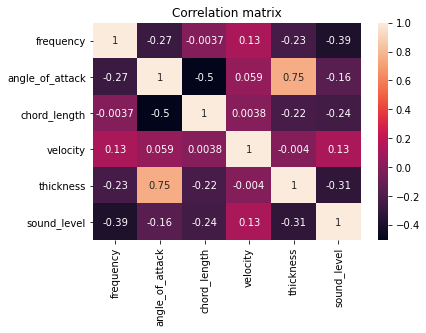

In [41]:
# plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matrix')

print("The input features do not appear to be correlated to the target value (sound value) as their correlation co-efficients are less than 0.4. The input features also do not appear to be collinear to one another as the correlation co-efficients are less than 0.8.")


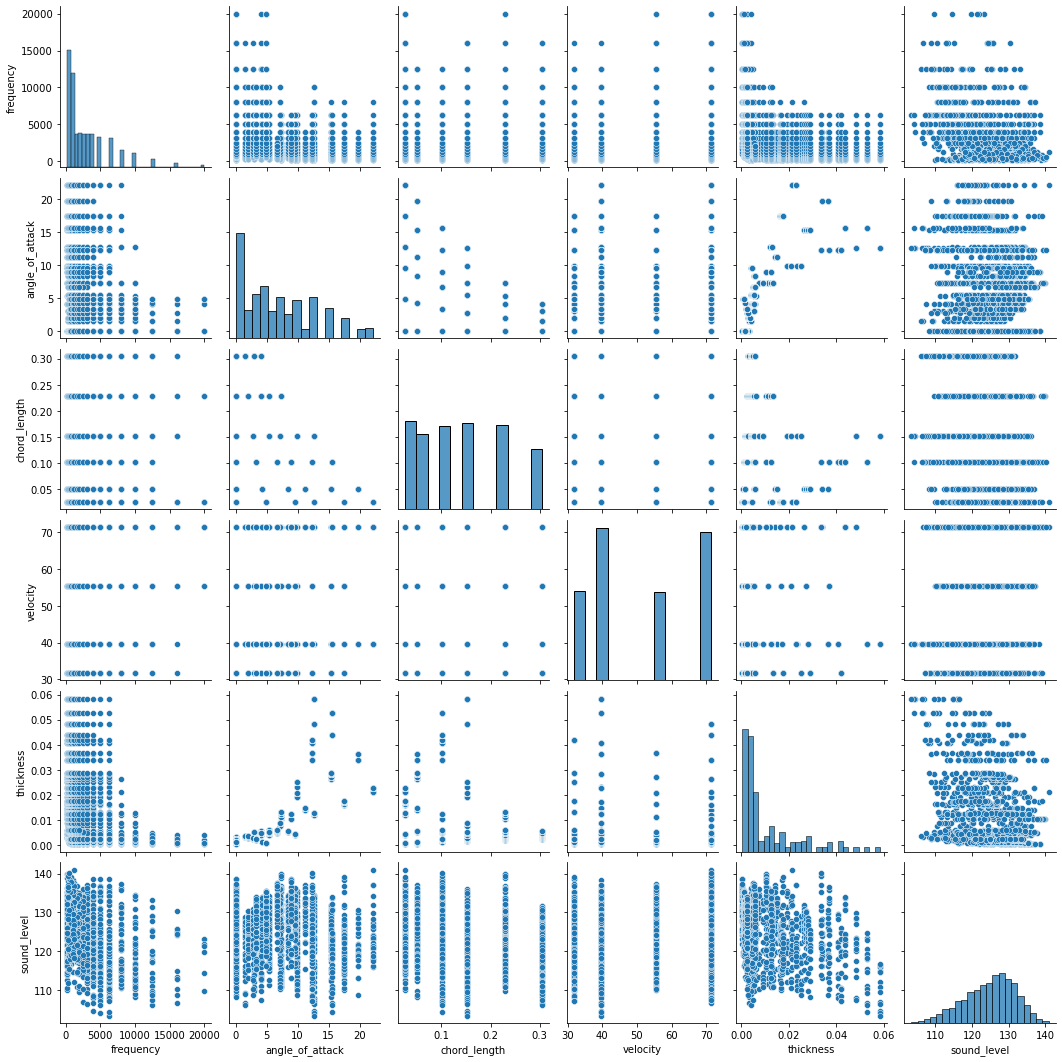

In [40]:
# Visualise the correlation using scatterplot

sns.pairplot(df)

## 2) Data Pre-processing and cleaning

Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.

In [24]:
# No missing values observed

df.isna().value_counts()

frequency  angle_of_attack  chord_length  velocity  thickness  sound_level
False      False            False         False     False      False          1503
dtype: int64

In [26]:
# Skewness and outliers observed in the data - apply log transformation 
# Addition of 0.1 to handle zeros in the values (log 0 results in undefined)
# https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

log_freq = np.log(df['frequency']+0.1)
log_angle_of_attack = np.log(df['angle_of_attack']+0.1)
log_chord_length = np.log(df['chord_length']+0.1)
log_velocity = np.log(df['velocity']+0.1)
log_thickness = np.log(df['thickness']+0.1)


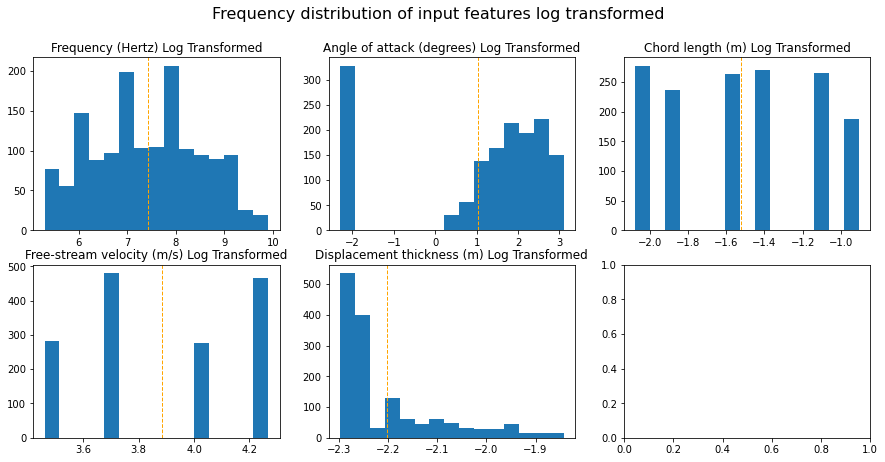

In [38]:
# Visualise the resulting distribution of log transformed features 

fig, ax = plt.subplots(2,3, figsize=(15, 7))

fig.suptitle('Frequency distribution of input features log transformed',fontsize=16)

# Frequency distribution of frequency

ax[0,0].hist(log_freq,bins=15)
ax[0,0].set_title('Frequency (Hertz) Log Transformed')
ax[0,0].axvline(log_freq.mean(), color='orange', linestyle='dashed', linewidth=1)


# Frequency distribution of angle of attack

ax[0,1].hist(log_angle_of_attack,bins=15)
ax[0,1].set_title('Angle of attack (degrees) Log Transformed')
ax[0,1].axvline(log_angle_of_attack.mean(), color='orange', linestyle='dashed', linewidth=1)
# plt.annotate(f'Average sound level = {avg_value} decibels', xy=(0, 0), xytext=(2, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05))


# Frequency distribution of chord length

ax[0,2].hist(log_chord_length,bins=15)
ax[0,2].set_title('Chord length (m) Log Transformed')
ax[0,2].axvline(log_chord_length.mean(), color='orange', linestyle='dashed', linewidth=1)

# Frequency distribution of velocity

ax[1,0].hist(log_velocity,bins=15)
ax[1,0].set_title('Free-stream velocity (m/s) Log Transformed')
ax[1,0].axvline(log_velocity.mean(), color='orange', linestyle='dashed', linewidth=1)

# Frequency distribution of thickness

ax[1,1].hist(log_thickness,bins=15)
ax[1,1].set_title('Displacement thickness (m) Log Transformed')
ax[1,1].axvline(log_thickness.mean(), color='orange', linestyle='dashed', linewidth=1)

plt.show()

In [42]:
print('It was observed that log transformation improved the distribution of frequency feature, but the shape does not approximate a normal distribution. The log transformation also did not improve the distribution of the other features.')

It was observed that log transformation improved the distribution of frequency feature, but the shape does not approximate a normal distribution. The log transformation also did not improve the distribution of the other features.


In [ ]:
# Feature importance


In [ ]:
# Split dataset into test and train



In [ ]:
# Features have values at different scales
# Use fit-transform to standardize the values



## 3) Model building

In [43]:
print('The assumptions to perform linear regression are not met as the distribution of the data is not normally distributed, even after log transformation. Furthermore, the input features and target values are not linearly related.')
print('Hence it was decided that it would be better to build a machine learning model based on a classification problem rather than a regression problem.')

The assumptions to perform linear regression are not met as the distribution of the data is not normally distributed, even after log transformation. Furthermore, the input features and target values are not linearly related.
Hence it was decided that it would be better to build a machine learning model based on a classification problem rather than a regression problem.
